In [8]:
import ROOT

In [9]:
import mplhep 
import pandas as pd 
import numpy as np 
import uproot
from matplotlib import pyplot as plt

In [10]:
import awkward as ak

In [11]:
# These have been cut with applycuts2tree
data_file = "Lb2JpsipK_Data2016_S26_sel.root"
mc_file = "Lb2JpsipK_MC2016_S26_sel.root"

# Plot Variables

```
Lambda_b0_P 100 0 5e5
Lambda_b0_PX 100 -35000 35000
Lambda_b0_PY 100 -35000 35000
Lambda_b0_PZ 100 0 6e5
Lambda_b0_PT 100 0 30e3
Lambda_b0_FD_OWNPV 100 0 70
nTracks 100 0 620
```

Vars to fit:
```
Lambda_b0_M
Lambda_b0_P
Lambda_b0_PE
Lambda_b0_PX
Lambda_b0_PY
Lambda_b0_PZ
Lambda_b0_PT
Lambda_b0_KinFit_M
Lambda_b0_KinFit_P
Lambda_b0_KinFit_MERR
Lambda_b0_KinFit_PERR
Lambda_b0_FD_OWNPV
Lambdast_M
nTracks
```

* Get s-weights

https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/blob/master/selection/mc_corrections/lb2jpsipk/splot/get_sweights.py?ref_type=heads

* Plot s-weighted data, MC and re-weighted MC

https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/blob/master/selection/mc_corrections/lb2jpsipk/splot/get_evt_corr.py?ref_type=heads

https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/blob/master/selection/mc_corrections/lb2jpsipk/splot/corr_plots.py?ref_type=heads

* Plot 1D and 2D s-weighted data

https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/blob/master/selection/mc_corrections/lb2jpsipk/splot/get_corr_histo.py?ref_type=heads

# MC Corrections 

The optimisation of selection fully relies on simulation. The BDT for instance is trained using MC as proxy for the signal.
To cross-check the simulation distributions for different parts of the decay chain, three high-rate modes (for which data is abundant) is used


* Lb2pKJPsi should not depend on the particular decay mode. Lambda, p and piplus/minus are cmpared to data using Lb2LJPsi candidates. 
* photon properties are studied in B02K0*gamma events

So next things we have to do are: 

* Locate the appropriate control modes paths
* Apply selections on the control modes. 
* Do the mass fit with a double-tail Crystal-Ball function


The 2016 analysis has some explanation [here](https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/tree/master/selection/mc_corrections/lb2jpsipk?ref_type=heads).

The cuts on the Lb2jpsiPK are as follows:

```bash
(Lambda_b0_L0MuonDecision_TOS || Lambda_b0_L0DiMuonDecision_TOS)
(Lambda_b0_Hlt1TrackMVADecision_TOS || Lambda_b0_Hlt1TwoTrackMVADecision_TOS)
(Lambda_b0_Hlt2Topo2BodyDecision_TOS || Lambda_b0_Hlt2TopoMu2BodyDecision_TOS || Lambda_b0_Hlt2TopoMu3BodyDecision_TOS || Lambda_b0_Hlt2TopoMu4BodyDecision_TOS || Lambda_b0_Hlt2DiMuonDetachedHeavyDecision_TOS || Lambda_b0_Hlt2DiMuonDetachedJPsiDecision_TOS || Lambda_b0_Hlt2DiMuonDetachedDecision_TOS)
pplus_PT > 400
Kminus_PT > 400
pplus_P > 7500
Kminus_P > 2000
Lambda_b0_ENDVERTEX_CHI2 < 4
Lambda_b0_DIRA_OWNPV > 0.9999
pplus_PIDp > 0
pplus_PIDp - pplus_PIDK > 8
Kminus_PIDK > 0
pplus_isMuon == 0
Kminus_isMuon == 0
Jpsi_M > 3000
Jpsi_M < 3200
```

Here are the locations:
```bash
# Data
/eos/lhcb/wg/RD/Lb2L0Gamma/Lb2JpsipK/Data/Lb2JpsipK_Data2016_S26.root

# MC
/eos/lhcb/wg/RD/Lb2L0Gamma/Lb2JpsipK/MC/Lb2JpsipK_MC2016_S26.root
```

In [12]:
def uprootOpenFile(filePath, decayTree='Lb2JpsipKTuple/DecayTree'):
    with uproot.open(filePath) as file:
        df = file[decayTree].arrays(library='ak')
    
    return df

In [13]:
#mc_df = uprootOpenFile(mc_file)
#data_df = uprootOpenFile(data_file)

In [14]:
def plot_comparison(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1)
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1)

    mplhep.histplot((hsig, bins), label='MC', )
    mplhep.histplot(hbkg, bins=bins, label='Data')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')

In [15]:
tree = "Lb2JpsipKTuple/DecayTree"

In [16]:
import pickle
import numpy as np 

# Using a Pickle file 

## What is a Pickle file?

A pickle file is a serialized format for Python objects which allows you to save Python objects such as dictionaries, lists, dataframes, Awkward arrays to a file so you can easily load them later on without the need to recompute them or reload them from scratch. 

This is quite helpful when you are working with big ROOT files. 
Here, we've opened a ROOT file and saved the tree into a data frame. We can also select only certain variables into the pickle file. 

We can take the example from the [starterkit](https://gitlab.cern.ch/femiguel/mva-starterkit-lesson/-/blob/master/load_data_pickle.py?ref_type=heads).

In [17]:
variables = ['Jpsi_M', 'Kminus_isMuon', 'pplus_isMuon', 'Kminus_PIDK', 'pplus_PIDp', 'pplus_PIDK',
             'Lambda_b0_DIRA_OWNPV', 'Lambda_b0_ENDVERTEX_CHI2', 'Kminus_P', 'pplus_P', 'Kminus_PT', 'pplus_PT', 'Lambda_b0_Hlt2Topo2BodyDecision_TOS',
             'Lambda_b0_Hlt2TopoMu2BodyDecision_TOS', 'Lambda_b0_Hlt2TopoMu3BodyDecision_TOS', 'Lambda_b0_Hlt2TopoMu4BodyDecision_TOS',
             'Lambda_b0_Hlt2DiMuonDetachedDecision_TOS', 'Lambda_b0_Hlt2DiMuonDetachedJPsiDecision_TOS', 'Lambda_b0_Hlt2DiMuonDetachedHeavyDecision_TOS',
             'Lambda_b0_Hlt1TrackMVADecision_TOS', 'Lambda_b0_L0MuonDecision_TOS', 'Lambda_b0_L0DiMuonDecision_TOS', 'Lambda_b0_Hlt1TwoTrackMVADecision_TOS'    
            ]

lb0_vars = ['Lambda_b0_M', 'Lambda_b0_MM',
'Lambda_b0_P',
'Lambda_b0_PE',
'Lambda_b0_PX',
'Lambda_b0_PY',
'Lambda_b0_PZ',
'Lambda_b0_PT',
'Lambda_b0_KinFit_M',
'Lambda_b0_KinFit_P',
'Lambda_b0_KinFit_MERR',
'Lambda_b0_KinFit_PERR',
'Lambda_b0_FD_OWNPV',
'Lambdast_M',
'nTracks']

In [18]:
t_mc = uproot.open(f"{mc_file}:{tree}")
dfmc = t_mc.arrays(variables + lb0_vars, library="ak")

In [19]:
with open("lb2jpsipk_mc.pickle", "wb") as f:
    pickle.dump(dfmc, f)

In [20]:
t_data = uproot.open(f"{data_file}:{tree}")
dfdata = t_data.arrays(variables +lb0_vars, library="ak")

In [21]:
with open("lb2jpsipk_data.pickle", "wb") as f:
    pickle.dump(dfdata, f)

Next, we'll learn how to make plots from the pickle files and access the information we saved.. 

Just in case if we need to access them later we do:

In [22]:
with open("lb2jpsipk_mc.pickle", "rb") as f:
    mc_df = pickle.load(f)

In [23]:
with open("lb2jpsipk_data.pickle", "rb") as f:
    data_df = pickle.load(f)

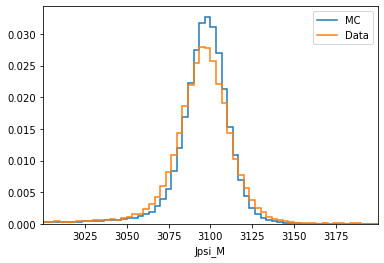

In [24]:
plot_comparison('Jpsi_M', mc_df, data_df)

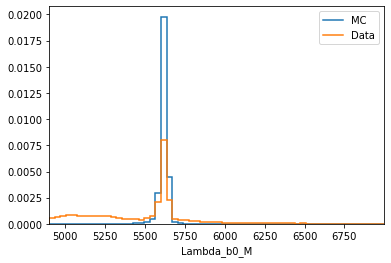

In [25]:
plot_comparison('Lambda_b0_M', mc_df, data_df) 

Our goal now is to fit the control modes with a double-tail Crystal-Ball (see eqn. 18 of page 34 of AN for 2016) to describe the signal distribution and an exponential function to describe the bacgkround. 

Let's try to follow these old codes: 

* https://gitlab.cern.ch/LHCb-RD/rad-lb2l0gamma-obs/-/blob/master/selection/fitMC/fit_l0mass_data.py?ref_type=heads
* https://swan-k8s.cern.ch/user/ciperez/notebooks/SWAN_projects/lb2l0gamma/notebooks/Lb2L0GammaMassFit.ipynb
* https://swan-k8s.cern.ch/user/ciperez/notebooks/SWAN_projects/lb2l0gamma/notebooks/FitTest.ipynb

In [26]:
from ROOT import RooFit, RooRealVar, RooCBShape, RooDataSet, RooArgSet, RooPolynomial, RooAddPdf, RooArgList, RooFormulaVar, RooCrystalBall, RooStats, RooPlot 

RooFit first!

In [27]:
massvar = 'Lambda_b0_M'
minM = 5520
maxM = 5800

In [28]:
mass = RooRealVar("massVar", "Mass", minM, maxM)

In [29]:
data = RooDataSet("data", "Dataset with mass", RooArgSet(mass))

In [30]:
for row in mc_df:
    mass_value = row[massvar]
    if minM <= mass_value <= maxM:
        mass.setVal(mass_value)
        data.add(RooArgSet(mass))

The above works for an awkward array

In [31]:
N_total_MC = data.numEntries()
print('MC total entries = ', N_total_MC)

MC total entries =  246431


In [32]:
# Define the Parameters of the Double Crystal Ball for the signal 

mean = RooRealVar("mean", "Mean", 5620, 5600, 5640)
sigma = RooRealVar("sigma", "Width", 8, 1., 20)
alphaL = RooRealVar("alphaL", "Left Alpha", 4, 1, 8)
nL = RooRealVar("nL", "Left Power", 5., 2., 10)
alphaR = RooRealVar("alphaR", "Right Alpha", 4, 1, 8)
nR = RooRealVar("nR", "Right Power", 5., 2., 10)

In [33]:
# Create the Double Crystal Ball model for the signal
doubleCB = RooCrystalBall("doubleCB", "Double Crystal Ball PDF", mass, mean, sigma, alphaL, nL, alphaR, nR)

In [34]:
# Define parameters for the first-order polynomial for background
coeff = RooRealVar("coeff", "Coefficient", -0.1, 0.1)

In [35]:
# Create the polynomial background term
poly_bg = RooPolynomial("poly_bg", "First-order Polynomial Background", mass, RooArgList(coeff))

In [36]:
N_signal = RooRealVar("N_signal", "Total number of Signal", 0.95*N_total_MC, 0.8*N_total_MC, N_total_MC)

In [37]:
N_background = RooRealVar("N_background", "Total number of Background", 0.05*N_total_MC, 0., 0.2*N_total_MC)

In [38]:
combined_model = RooAddPdf("combined_model", "Signal + Background", RooArgList(doubleCB, poly_bg), RooArgList(N_signal, N_background))

In [39]:
fit_result = combined_model.fitTo(data, 
                                   RooFit.Save(), 
                                   #RooFit.Range("fitRange"),  # Using named range for clarity
                                   #RooFit.Strategy(3),  # Start with a faster strategy
                                   #RooFit.Minimizer("Minuit2", "simplex,migrad,simplex,migrad,simplex,migrad"),
                                   RooFit.PrintLevel(3),
                                   #RooFit.Extended(True),
                                   RooFit.NumCPU(4, 0))  # Use 4 CPUs if available


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(combined_model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_combined_model_data) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 4500 convergence for edm < 1 strategy 1
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (-1.63165e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	N_background=12321.5	N_signal=234109	alphaL=4	alphaR=4	coeff=-0.0177229	mean=5620	nL=5	nR=5	sigma=8
RooAbsPdf::poly_bg_over_poly_bg_Int[massVar][ numerator=poly_bg denominator=poly_bg_Int[massVar] ]

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator 9 free parameters, FCN pointer 0x7ffc2e44e490
Info in <Minuit2>: InitialGradientCalculator Calculating initial gradient at point 	[    -0.5235987756     0.5235987756    -0.1433475689    -0.1433475689                0                0    -0.2526802551    -0.2526802551    -0.2662940171]	
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter N_background value -0.523599 [ -0.251799 , 0.218906 ] dirin 0.235352 grd 4.24895 g2 18.0536
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter N_signal value 0.523599 [ -0.218906 , 0.251799 ] dirin 0.235352 grd 4.24895 g2 18.0536
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient for parameter alphaL value -0.143348 [ -0.206609 , 0.200522 ] dirin 0.203565 grd 4.91243 g2 24.1319
Info in <Minuit2>: InitialGradientCalculator Computed initial gradient fo

In [40]:
# Print the results of the fit
print("Fit Results:")
fit_result.Print()

#print parameters
print("Signal Model Parameters:")
print("Mean:", mean.getVal(), "±", mean.getError())
print("Sigma:", sigma.getVal(), "±", sigma.getError())
print("AlphaL:", alphaL.getVal(), "±", alphaL.getError())
print("NL:", nL.getVal(), "±", nL.getError())
print("AlphaR:", alphaR.getVal(), "±", alphaR.getError())
print("NR:", nR.getVal(), "±", nR.getError())

print("\nBackground Model Parameters:")
print("Coefficient:", coeff.getVal(), "±", coeff.getError())
print("Number of Signal:", N_signal.getVal(), "±", N_signal.getError())
print("Number of Background:", N_background.getVal(), "±", N_background.getError())

Fit Results:
Signal Model Parameters:
Mean: 5620.980518404407 ± 0.039882928622319014
Sigma: 14.383558190795956 ± 0.04262663615091089
AlphaL: 1.4751815569089686 ± 0.018328405416643268
NL: 3.538130065039666 ± 0.19386452201809878
AlphaR: 1.8484653471747914 ± 0.020317154968178652
NR: 9.999972092377847 ± 0.5909487190812293

Background Model Parameters:
Coefficient: -0.00017083561407469527 ± 2.886374648639978e-07
Number of Signal: 241064.69308421787 ± 567.6491944473964
Number of Background: 5373.913072923178 ± 294.16194030911356

  RooFitResult: minimized FCN value: -1.74036e+06, estimated distance to minimum: 0.00412809
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
          N_background    5.3739e+03 +/-  2.94e+02
              N_signal    2.4106e+05 +/-  5.68e+02
                alphaL    1.4752e+00 +/-  1.83e-02


[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (poly_bg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (doubleCB)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file fit_signal_and_background_mc.png has been created


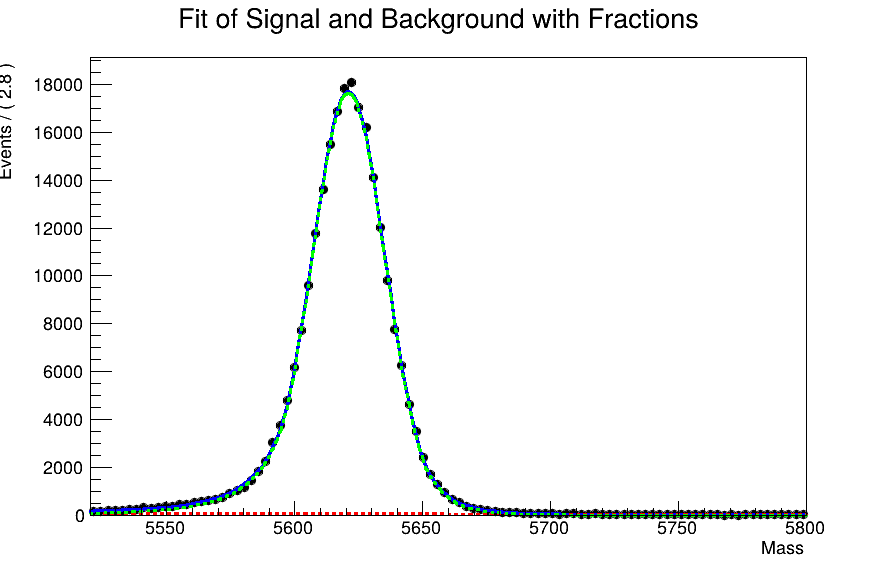

In [41]:
# Plot the data and the fit result
frame = mass.frame(RooFit.Title("Fit of Signal and Background with Fractions"))
data.plotOn(frame)
combined_model.plotOn(frame)
combined_model.plotOn(frame, RooFit.Components("poly_bg"), RooFit.LineStyle(ROOT.kDashed), RooFit.LineColor(ROOT.kRed))
combined_model.plotOn(frame, RooFit.Components("doubleCB"), RooFit.LineStyle(ROOT.kDashed), RooFit.LineColor(ROOT.kGreen))
# Draw the frame on a canvas
canvas = ROOT.TCanvas("canvas", "Fit Results", 900, 600)
frame.Draw()
canvas.SaveAs("fit_signal_and_background_mc.png")  # Save the plot to a PNG file
canvas.Draw()


[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (poly_bg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (doubleCB)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file fit_signal_and_background_mc.png has been created


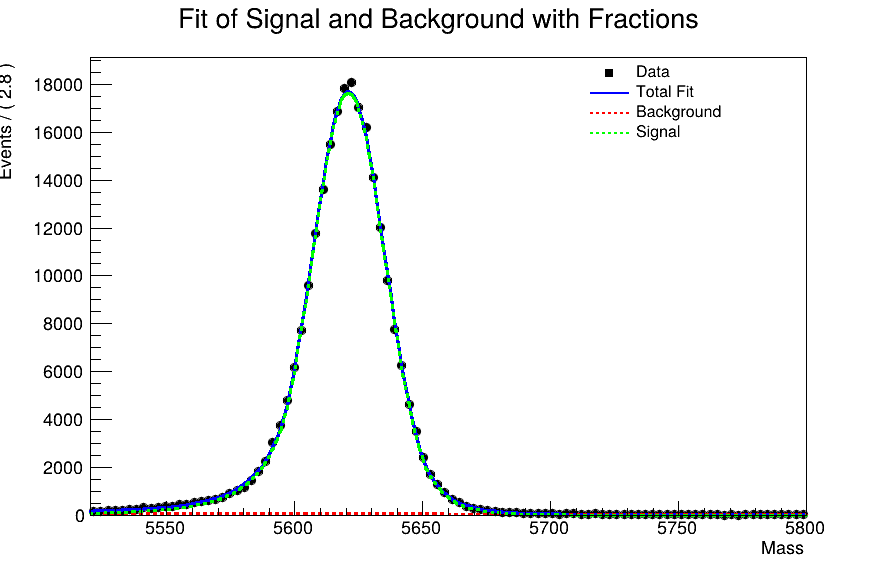

In [42]:
# Plot the data and the fit result
frame = mass.frame(RooFit.Title("Fit of Signal and Background with Fractions"))
data.plotOn(frame, RooFit.Name("data_hist"))
combined_model.plotOn(frame, RooFit.Name("total_fit"))
combined_model.plotOn(frame, RooFit.Components("poly_bg"), 
                     RooFit.LineStyle(ROOT.kDashed), 
                     RooFit.LineColor(ROOT.kRed),
                     RooFit.Name("bg_fit"))
combined_model.plotOn(frame, RooFit.Components("doubleCB"), 
                     RooFit.LineStyle(ROOT.kDashed), 
                     RooFit.LineColor(ROOT.kGreen),
                     RooFit.Name("sig_fit"))

# Create and customize the legend
legend = ROOT.TLegend(0.65, 0.75, 0.89, 0.89)
legend.SetBorderSize(0)
legend.SetFillStyle(0)

# Create separate line objects for legend entries
total_line = ROOT.TLine()
total_line.SetLineColor(ROOT.kBlue)  # Default RooFit color
total_line.SetLineWidth(2)

bg_line = ROOT.TLine()
bg_line.SetLineColor(ROOT.kRed)
bg_line.SetLineStyle(ROOT.kDashed)
bg_line.SetLineWidth(2)

sig_line = ROOT.TLine()
sig_line.SetLineColor(ROOT.kGreen)
sig_line.SetLineStyle(ROOT.kDashed)
sig_line.SetLineWidth(2)

# Add entries to the legend
legend.AddEntry("data_hist", "Data", "P")
legend.AddEntry(total_line, "Total Fit", "L")
legend.AddEntry(bg_line, "Background", "L")
legend.AddEntry(sig_line, "Signal", "L")

# Draw the frame on a canvas
canvas = ROOT.TCanvas("canvas", "Fit Results", 900, 600)
frame.Draw()
legend.Draw("same")

canvas.SaveAs("fit_signal_and_background_mc.png")
canvas.Draw()

Here's adding a pull plot.

[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (poly_bg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (doubleCB)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file fit_signal_and_background_with_pull.png has been created


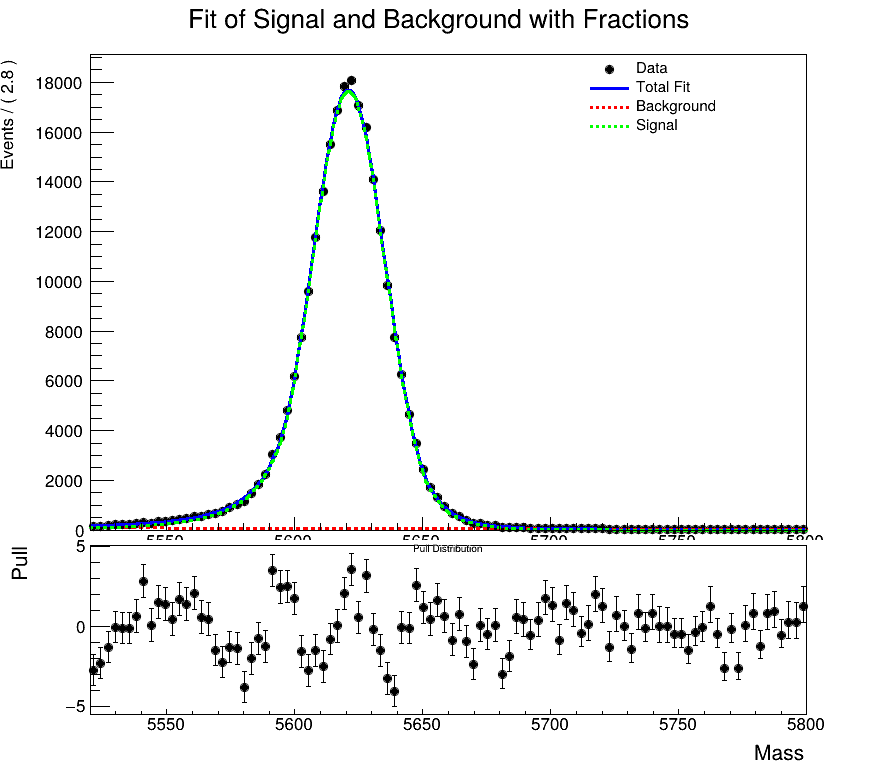

In [43]:
# Define canvas with two pads
canvas = ROOT.TCanvas("canvas", "Fit Results with Pull Plot", 900, 800)
canvas.Divide(1, 2)  # Divide the canvas into two vertical pads
pad1 = canvas.cd(1)
pad1.SetPad(0.0, 0.3, 1.0, 1.0)  # Top pad for the main plot
pad1.SetBottomMargin(0.02)  # Reduce bottom margin for better separation
pad2 = canvas.cd(2)
pad2.SetPad(0.0, 0.0, 1.0, 0.3)  # Bottom pad for the pull plot
pad2.SetTopMargin(0.02)  # Reduce top margin
pad2.SetBottomMargin(0.25)  # Increase bottom margin for axis labels

# Top pad: Main plot
pad1.cd()
frame = mass.frame(RooFit.Title("Fit of Signal and Background with Fractions"))
data.plotOn(frame, RooFit.Name("data_hist"))
combined_model.plotOn(frame, RooFit.Name("total_fit"))
combined_model.plotOn(frame, RooFit.Components("poly_bg"), 
                      RooFit.LineStyle(ROOT.kDashed), 
                      RooFit.LineColor(ROOT.kRed),
                      RooFit.Name("bg_fit"))
combined_model.plotOn(frame, RooFit.Components("doubleCB"), 
                      RooFit.LineStyle(ROOT.kDashed), 
                      RooFit.LineColor(ROOT.kGreen),
                      RooFit.Name("sig_fit"))

# Stats box (automatic if using RooFit's plotOn and ROOT)
frame.Draw()

# Add the legend
legend = ROOT.TLegend(0.65, 0.75, 0.89, 0.89)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.AddEntry("data_hist", "Data", "P")
legend.AddEntry("total_fit", "Total Fit", "L")
legend.AddEntry("bg_fit", "Background", "L")
legend.AddEntry("sig_fit", "Signal", "L")
legend.Draw("same")

# Bottom pad: Pull plot
pad2.cd()
pull_hist = frame.pullHist("data_hist", "total_fit")  # Create pull histogram
pull_frame = mass.frame(RooFit.Title("Pull Distribution"))
pull_frame.addPlotable(pull_hist, "P")  # Add the pull histogram

# Customize the pull plot
pull_frame.GetYaxis().SetTitle("Pull")
pull_frame.GetYaxis().SetNdivisions(505)
pull_frame.GetYaxis().SetTitleSize(0.1)
pull_frame.GetYaxis().SetTitleOffset(0.5)
pull_frame.GetYaxis().SetLabelSize(0.08)
pull_frame.GetXaxis().SetTitleSize(0.1)
pull_frame.GetXaxis().SetLabelSize(0.08)
pull_frame.GetXaxis().SetTitleOffset(1.0)
pull_frame.Draw()

# Draw everything
canvas.cd()
canvas.SaveAs("fit_signal_and_background_with_pull.png")
canvas.Draw()


[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (poly_bg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) directly selected PDF components: (doubleCB)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(combined_model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file fit_signal_and_background_with_pull.png has been created


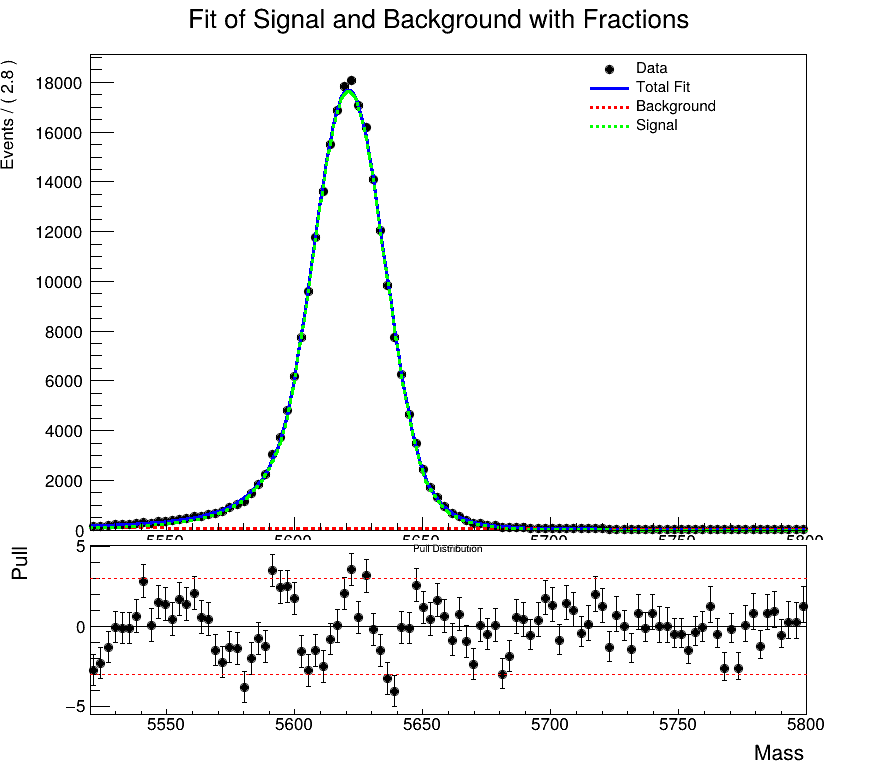

In [44]:
# Define canvas with two pads
canvas = ROOT.TCanvas("canvas2", "Fit Results with Pull Plot", 900, 800)
canvas.Divide(1, 2)  # Divide the canvas into two vertical pads
pad1 = canvas.cd(1)
pad1.SetPad(0.0, 0.3, 1.0, 1.0)  # Top pad for the main plot
pad1.SetBottomMargin(0.02)  # Reduce bottom margin for better separation
pad2 = canvas.cd(2)
pad2.SetPad(0.0, 0.0, 1.0, 0.3)  # Bottom pad for the pull plot
pad2.SetTopMargin(0.02)  # Reduce top margin
pad2.SetBottomMargin(0.25)  # Increase bottom margin for axis labels

# Top pad: Main plot
pad1.cd()
frame = mass.frame(RooFit.Title("Fit of Signal and Background with Fractions"))
data.plotOn(frame, RooFit.Name("data_hist"))
combined_model.plotOn(frame, RooFit.Name("total_fit"))
combined_model.plotOn(frame, RooFit.Components("poly_bg"), 
                      RooFit.LineStyle(ROOT.kDashed), 
                      RooFit.LineColor(ROOT.kRed),
                      RooFit.Name("bg_fit"))
combined_model.plotOn(frame, RooFit.Components("doubleCB"), 
                      RooFit.LineStyle(ROOT.kDashed), 
                      RooFit.LineColor(ROOT.kGreen),
                      RooFit.Name("sig_fit"))

# Draw the frame
frame.Draw()

# Display the statistics box
ROOT.gStyle.SetOptStat(1111)  # Enable detailed stats
ROOT.gStyle.SetStatX(0.89)  # X position of the stats box (top right corner)
ROOT.gStyle.SetStatY(0.89)  # Y position of the stats box

# Add the legend
legend = ROOT.TLegend(0.65, 0.75, 0.89, 0.89)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.AddEntry("data_hist", "Data", "P")
legend.AddEntry("total_fit", "Total Fit", "L")
legend.AddEntry("bg_fit", "Background", "L")
legend.AddEntry("sig_fit", "Signal", "L")
legend.Draw("same")

# Bottom pad: Pull plot
pad2.cd()
pull_hist = frame.pullHist("data_hist", "total_fit")  # Create pull histogram
pull_frame = mass.frame(RooFit.Title("Pull Distribution"))
pull_frame.addPlotable(pull_hist, "P")  # Add the pull histogram

# Customize the pull plot
pull_frame.GetYaxis().SetTitle("Pull")
pull_frame.GetYaxis().SetNdivisions(505)
pull_frame.GetYaxis().SetTitleSize(0.1)
pull_frame.GetYaxis().SetTitleOffset(0.5)
pull_frame.GetYaxis().SetLabelSize(0.08)
pull_frame.GetXaxis().SetTitleSize(0.1)
pull_frame.GetXaxis().SetLabelSize(0.08)
pull_frame.GetXaxis().SetTitleOffset(1.0)
pull_frame.Draw()

# Add horizontal lines to the pull plot
line_zero = ROOT.TLine(pull_frame.GetXaxis().GetXmin(), 0, pull_frame.GetXaxis().GetXmax(), 0)
line_zero.SetLineColor(ROOT.kBlack)
line_zero.SetLineStyle(ROOT.kSolid)
line_zero.Draw("same")

line_plus3 = ROOT.TLine(pull_frame.GetXaxis().GetXmin(), 3, pull_frame.GetXaxis().GetXmax(), 3)
line_plus3.SetLineColor(ROOT.kRed)
line_plus3.SetLineStyle(ROOT.kDashed)
line_plus3.Draw("same")

line_minus3 = ROOT.TLine(pull_frame.GetXaxis().GetXmin(), -3, pull_frame.GetXaxis().GetXmax(), -3)
line_minus3.SetLineColor(ROOT.kRed)
line_minus3.SetLineStyle(ROOT.kDashed)
line_minus3.Draw("same")

# Draw everything
canvas.cd()
canvas.SaveAs("fit_signal_and_background_with_pull.png")
canvas.Draw()


Let's now try with either the configuration from C.M. Benito's code or z fit. Below is a copy of the simplefit. But I'll do the Zfit one in another notebook.

In [45]:
def simpleFit(tree, cuts, var, mean, sigma, xmin=4000, xmax=7000, name='fit', no_bkg=False):
    # signal pdf
    mean  = RooRealVar("mean", "mean",  mean, mean-50, mean+50,
                       PlotLabel="#mu")
    sigma = RooRealVar("sigma", "sigma", sigma, 1, 5,
                       PlotLabel="#sigma")
    alphaL= RooRealVar("alphaL", "alphaL", 2, 0, 10, PlotLabel="#alpha_{L}")
    nL = RooRealVar("nL", "nL", 5, 0, 10, PlotLabel="n_{L}")
    alphaH = RooRealVar("alphaH", "alphaH", 2, 0, 10,
                        PlotLabel="#alpha_{R}")
    nH = RooRealVar("nH", "nH", 5, 0, 15, PlotLabel="n_{R}")

    dt_cb = RooDtCB("dt_cb", "dt_cb", mass, mean, sigma,
                    alphaL, nL, alphaH, nH)
    
    # bkg pdf
    tau = RooRealVar("tau", "tau", 0.01, -0.1, 0.1, PlotLabel="#tau")
    exp = RooExponential("exp", "exp", mass, tau)

    # model
    n_sig = RooRealVar("n_sig", "n_sig", 6e6, 1e5, 1e7, PlotLabel="N_{sig}")
    n_bkg = RooRealVar("n_bkg", "n_bkg", 6e5, 1e4, 1e6, PlotLabel="N_{bkg}")
    if no_bkg:
        n_bkg.setVal(0)
        n_bkg.setConstant()
    model = RooAddPdf("model", "model", RooArgList(dt_cb, exp),
                      RooArgList(n_sig, n_bkg))
    
    # define dataset
    if (cuts!=""):
        f = ROOT.TFile.Open("/tmp/cmarinbe/tmpfile.root", "recreate")
        tree = tree.CopyTree(cuts)
    ds = RooDataSet("data", "dataset with x", tree, RooArgSet(mass))
    
    # plot dataset and fit
    massFrame = mass.frame()
    ds.plotOn(massFrame, Name="histo_data")
    
    fitResults = model.fitTo(ds)
    model.plotOn(massFrame, RooFit.VisualizeError(fitResults, 1),
                 RooFit.Name("curve_model"))
    model.plotOn(massFrame, RooFit.Components("dt_cb"), RooFit.LineColor(ROOT.kBlue), RooFit.LineStyle(ROOT.kDashed))
    model.plotOn(massFrame, RooFit.Components("exp")  , RooFit.LineColor(ROOT.kRed) , RooFit.LineStyle(ROOT.kDashed))
    model.paramOn(massFrame, Layout=(.65,.95,.93),
                  Parameters=RooArgSet(mean, sigma, tau, n_sig, n_bkg))
    Plot = ResidualPlot("chi2plot", massFrame)
    chi2 = Plot.addResidual("histo_data", "curve_model")
    Plot.plot(bigLabels=True, residualBand=True)
    Plot.canvas.SaveAs("{}.root".format(name))
    
    # print results
    log.info("{} has been fit to {} with a chi2 = {}".format(model.GetName(),
                                                             tree.GetName(), chi2))
    log.info("Total number of entries is: {}".format(ds.numEntries()))
    
    return ds, model, Plot, chi2

# Using the Zfit package

```python
# Step 1: Load Data from a ROOT File into an Awkward Array
with uproot.open("your_file.root") as file:
    tree = file["your_tree"]
    awkward_array = tree.arrays(library="ak")  # Load as awkward array

# Step 2: Extract Observable Data (e.g., 'mass')
mass_data = ak.to_numpy(awkward_array["mass"])  # Convert to NumPy array

# Step 3: Define the Observable Space
obs = zfit.Space("mass", limits=(5000, 6000))

# Step 4: Create a zfit.Data Object
data = zfit.Data.from_numpy(obs=obs, array=mass_data)

# Use the data for fitting or other tasks

sig_yield = zfit.Parameter('sig_yield', 25000, 0, 50000, step_size=1) 
bkg_yield = zfit.Parameter('bkg_yield', 100000, 0, 3e5, step_size=1)

```
Getting the yields from the root files
```python 
import pandas as pd

# Load your DataFrame
df = pd.read_pickle("your_data.pickle")  # Or use any loader for your DataFrame format

# Count signal and background events
sig_yield_initial = len(df[df['label'] == 'signal'])  # Assuming 'label' indicates event type
bkg_yield_initial = len(df[df['label'] == 'background'])

print(f"Initial Signal Yield: {sig_yield_initial}")
print(f"Initial Background Yield: {bkg_yield_initial}")

```

```python
import uproot
import numpy as np

# Load ROOT file and tree
file = uproot.open("your_file.root")
tree = file["your_tree"]

# Extract signal and background masks
data = tree.arrays(library="np")
signal_mask = data["label"] == b"signal"  # Assuming 'label' branch has byte strings
background_mask = data["label"] == b"background"

# Count events
sig_yield_initial = np.sum(signal_mask)
bkg_yield_initial = np.sum(background_mask)

print(f"Signal Yield: {sig_yield_initial}")
print(f"Background Yield: {bkg_yield_initial}")

# Initial guesses based on the DataFrames
sig_yield_i = len(mc_df)
bkg_yield_i = len(data_df) - sig_yield_i

# Create zfit Parameters with these initial values
sig_yield = zfit.Parameter('sig_yield', sig_yield_i, 0, 2 * sig_yield_i)
bkg_yield = zfit.Parameter('bkg_yield', bkg_yield_i, 0, 2 * bkg_yield_i)

print(f"Signal Yield Initial Estimate: {sig_yield_i}")
print(f"Background Yield Initial Estimate: {bkg_yield_i}")

```

```python 
mean = RooRealVar("mean", "Mean", 5620, 5600, 5640)
sigma = RooRealVar("sigma", "Width", 8, 1., 20)
alphaL = RooRealVar("alphaL", "Left Alpha", 4, 1, 8)
nL = RooRealVar("nL", "Left Power", 5., 2., 10)
alphaR = RooRealVar("alphaR", "Right Alpha", 4, 1, 8)
nR = RooRealVar("nR", "Right Power", 5., 2., 10)
ChatGPT said:
ChatGPT



import zfit
import tensorflow as tf

# Define parameters
mean = zfit.Parameter("mean", 5620, 5600, 5640)
sigma = zfit.Parameter("sigma", 8, 1., 20)
alphaL = zfit.Parameter("alphaL", 4, 1, 8)
nL = zfit.Parameter("nL", 5., 2., 10)
alphaR = zfit.Parameter("alphaR", 4, 1, 8)
nR = zfit.Parameter("nR", 5., 2., 10)

# Create the Crystal Ball model
cb_left = zfit.pdf.CrystalBall(mean=mean, sigma=sigma, alpha=alphaL, n=nL)
cb_right = zfit.pdf.CrystalBall(mean=mean, sigma=sigma, alpha=-alphaR, n=nR)  # Note the negative alpha for right tail

# You can combine the left and right Crystal Balls if needed using zfit PDFs



import uproot
import awkward as ak
import zfit

# Step 1: Load Data from a ROOT File into an Awkward Array
with uproot.open("your_file.root") as file:
    tree = file["your_tree"]
    awkward_array = tree.arrays(library="ak")  # Load as awkward array

# Step 2: Extract Observable Data (e.g., 'mass')
mass_data = ak.to_numpy(awkward_array["mass"])  # Convert to NumPy array

# Step 3: Define the Observable Space
obs = zfit.Space("mass", limits=(5000, 6000))

# Step 4: Create a zfit.Data Object
data = zfit.Data.from_numpy(obs=obs, array=mass_data)

# Use the data for fitting or other tasks

sig_yield = zfit.Parameter('sig_yield', 25000, 0, 50000, step_size=1) 
bkg_yield = zfit.Parameter('bkg_yield', 100000, 0, 3e5, step_size=1)



sig_yield = zfit.Parameter('sig_yield', 25000, 0, 50000, step_size=1)

# Define the composite model
model = zfit.pdf.SumPDF([signal_pdf, background_pdf], [sig_yield, bkg_yield])


import pandas as pd

# Load your DataFrame
df = pd.read_pickle("your_data.pickle")

# Count signal and background events
sig_yield_initial = len(df[df['label'] == 'signal'])  # Assuming 'label' column exists
bkg_yield_initial = len(df[df['label'] == 'background'])

print(f"Initial Signal Yield: {sig_yield_initial}")
print(f"Initial Background Yield: {bkg_yield_initial}")

Using ROOT and uproot:

import uproot
import numpy as np

# Load ROOT file
file = uproot.open("your_file.root")
tree = file["your_tree"]

# Extract data into arrays
data = tree.arrays(library="np")
signal


import pandas as pd

# Load your DataFrame
df = pd.read_pickle("your_data.pickle")  # Or use any loader for your DataFrame format

# Count signal and background events
sig_yield_initial = len(df[df['label'] == 'signal'])  # Assuming 'label' indicates event type
bkg_yield_initial = len(df[df['label'] == 'background'])

print(f"Initial Signal Yield: {sig_yield_initial}")
print(f"Initial Background Yield: {bkg_yield_initial}")

Using ROOT and uproot:

import uproot
import numpy as np

# Load ROOT file and tree
file = uproot.open("your_file.root")
tree = file["your_tree"]

# Extract signal and background masks
data = tree.arrays(library="np")
signal_mask = data["label"] == b"signal"  # Assuming 'label' branch has byte strings
background_mask = data["label"] == b"background"

# Count events
sig_yield_initial = np.sum(signal_mask)
bkg_yield_initial = np.sum(background_mask)

print(f"Signal Yield: {sig_yield_initial}")
print(f"Background Yield: {bkg_yield_initial}")

Scenario 2: Using Cuts or Selections

If the dataset does not explicitly label events but you can define signal and background regions based on some variable (e.g., mass), you can apply cuts:

Using Pandas:

# Define signal and background regions
signal_region = (df['mass'] > 5200) & (df['mass'] < 5400)
background_region = (df['mass'] < 5100) | (df['mass'] > 5500)

# Count events
sig_yield_initial = len(df[signal_region])
bkg_yield_initial = len(df[background_region])

print(f"Signal Yield: {sig_yield_initial}")
print(f"Background Yield: {bkg_yield_initial}")

Using ROOT and uproot:

# Define signal and background regions
signal_mask = (data["mass"] > 5200) & (data["mass"] < 5400)
background_mask = (data["mass"] < 5100) | (data["mass"] > 5500)

# Count events
sig_yield_initial = np.sum(signal_mask)
bkg_yield_initial = np.sum(background_mask)

print(f"Signal Yield: {sig_yield_initial}")
print(f"Background Yield: {bkg_yield_initial}")

total_events = len(df)
sig_yield_initial = total_events * 0.2  # Assume 20% signal
bkg_yield_initial = total_events * 0.8  # Assume 80% background


import zfit

# Use extracted yields as initial values
sig_yield = zfit.Parameter('sig_yield', sig_yield_initial, 0, 2 * sig_yield_initial)
bkg_yield = zfit.Parameter('bkg_yield', bkg_yield_initial, 0, 2 * bkg_yield_initial)

import zfit

# Define the range for the variable
minM, maxM = 5000, 6000  # Replace these with your specific range

# Create the observable
mass = zfit.Space('mass', limits=(minM, maxM))

mass_param = zfit.Parameter("massVar", initial_value=5500, lower_limit=5000, upper_limit=6000)


import zfit
import numpy as np

# Define your observable
mass = zfit.Space('mass', limits=(5000, 6000))

# Generate or load some data (replace this with your actual data)
data_array = np.random.uniform(5000, 6000, size=1000)  # Example data within range

# Create the dataset
data = zfit.Data.from_numpy(obs=mass, array=data_array)

import pandas as pd

# Load data from a pickle or any file
df = pd.read_pickle("your_data.pickle")  # Example file

# Extract the 'mass' column as a NumPy array
data_array = df['mass'].to_numpy()

# Create the dataset
data = zfit.Data.from_numpy(obs=mass, array=data_array)

for row in mc_df:
    mass_value = row[massvar]
    if minM <= mass_value <= maxM:
        mass.setVal(mass_value)
        data.add(RooArgSet(mass))

N_total_MC = data.numEntries()
print('MC total entries = ', N_total_MC)

import numpy as np
import zfit

# Define the mass observable
minM, maxM = 5000, 6000
mass = zfit.Space('mass', limits=(minM, maxM))

# Filter the data from mc_df (assuming mc_df is a DataFrame)
# Replace 'massvar' with the actual column name
filtered_mass_values = mc_df[(mc_df['massvar'] >= minM) & (mc_df['massvar'] <= maxM)]['massvar'].to_numpy()

# Create a zfit.Data object
data = zfit.Data.from_numpy(obs=mass, array=filtered_mass_values)

# Get the number of entries
N_total_MC = data.nevents
print('MC total entries = ', N_total_MC)

If you're using an awkward array instead of a DataFrame:

import awkward as ak

# Filter using awkward array methods
filtered_mass_values = mc_df[massvar][(mc_df[massvar] >= minM) & (mc_df[massvar] <= maxM)]

# Convert to NumPy and create the zfit.Data object
data = zfit.Data.from_numpy(obs=mass, array=ak.to_numpy(filtered_mass_values))

# Get the number of entries
N_total_MC = data.nevents
print('MC total entries = ', N_total_MC)

sig_yield = zfit.Parameter('sig_yield', 25000, 0, 50000,
                                step_size=1)  # step size: default is small, use appropriate
bkg_yield = zfit.Parameter('bkg_yield', 100000, 0, 3e5, step_size=1)

# Initial guesses based on the DataFrames
sig_yield_i = len(mc_df)
bkg_yield_i = len(data_df) - sig_yield_i

# Create zfit Parameters with these initial values
sig_yield = zfit.Parameter('sig_yield', sig_yield_i, 0, 2 * sig_yield_i)
bkg_yield = zfit.Parameter('bkg_yield', bkg_yield_i, 0, 2 * bkg_yield_i)

print(f"Signal Yield Initial Estimate: {sig_yield_i}")
print(f"Background Yield Initial Estimate: {bkg_yield_i}")

import awkward as ak
import zfit
import numpy as np

# Define the observable
obs = zfit.Space('mass', limits=(5000, 6000))

# Assume signal_awk and bkg_awk are awkward arrays containing the data
# Extract 'mass' data from awkward arrays and convert to NumPy
signal_np = ak.to_numpy(signal_awk['mass'])  # Replace 'mass' with the actual field name
bkg_np = ak.to_numpy(bkg_awk['mass'])        # Replace 'mass' with the actual field name

# Create zfit Data objects
signal_data = zfit.Data.from_numpy(obs=obs, array=signal_np)
bkg_data = zfit.Data.from_numpy(obs=obs, array=bkg_np)

# Concatenate the datasets
data = zfit.data.concat([signal_data, bkg_data])

signal_np = ak.to_numpy(signal_awk['mass'])  # Use the correct field name
bkg_np = ak.to_numpy(bkg_awk['mass'])
```





```python
# Yields
sig_yield = zfit.Parameter("sig_yield", len(mass_np), 0, 1.5 * len(mass_np))
bkg_yield = zfit.Parameter("bkg_yield", len(mass_data_np) - len(mass_np), 0, 1.5 * len(mass_data_np))

# Extended PDFs
extended_signal = signal_pdf.create_extended(sig_yield)
extended_background = background_pdf.create_extended(bkg_yield)

# Combined Model
model = zfit.pdf.SumPDF([extended_signal, extended_background])

# Perform Fitting
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=data_data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# Print fit results
print(result)
```

Signal and Background Contributions:

    In a typical analysis, the total dataset (mass_data_np) consists of both signal and background events.
    The signal events (mass_np) are a subset of the total dataset, often obtained from Monte Carlo simulations or data that is enriched in signal through specific selection criteria.

Background Yield Initialization:

    To estimate the number of background events, you subtract the estimated number of signal events (len(mass_np)) from the total number of events (len(mass_data_np)).
    This gives an initial guess for the number of events that belong to the background.

Why an Estimate?:

    When fitting the model, you need initial parameter values for the yields (sig_yield and bkg_yield).
    These initial values help the optimizer converge to the correct solution. Accurate initial guesses often speed up convergence and improve the robustness of the fit.